In [92]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [93]:
data = pd.read_csv("Heart_Disease_Indicators.csv",skiprows=0)
data.drop(['MentHlth','DiffWalk','Education','Income','PhysHlth','AnyHealthcare','NoDocbcCost','GenHlth'],axis=1)
X = data.values[:8000,1:]
Y = data.values[:8000,0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)


In [94]:
#KNeighborsClassifier
knnscore = []
for i in range(1,50):
    
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(X_train, Y_train)
    Ykneighbours_prediction = clf.predict(X_test)
    knnscore.append(accuracy_score(Y_test,Ykneighbours_prediction))
    
clf = KNeighborsClassifier(n_neighbors=20)
clf = clf.fit(X_train, Y_train)
Ykneighbours_prediction = clf.predict(X_test)
knnResult = accuracy_score(Y_test,Ykneighbours_prediction)
knnCVResult = cross_val_score(clf, X, Y, cv=5)
print("Train/test accuracy KNN:",knnResult,"%")
print("5 Fold validation accuracy KNN:",knnCVResult.mean(),"%")

Train/test accuracy KNN: 0.89375 %
5 Fold validation accuracy KNN: 0.9001250000000001 %


In [95]:
#print(knnscore)

In [96]:
#Random Forest Classifier (ensemble)
clfrandomforest = RandomForestClassifier()
clfrandomforest = clfrandomforest.fit(X_train, Y_train)
Yrandomforest_prediction = clfrandomforest.predict(X_test)
randomforestResult = accuracy_score(Y_test,Yrandomforest_prediction)
randomforestCVResult = cross_val_score(clfrandomforest, X, Y, cv=5)
print("Train/test accuracy Random Forest:",randomforestResult,"%")
print("5 Fold validation accuracy Random Forest:",randomforestCVResult.mean(),"%")

Train/test accuracy Random Forest: 0.8941666666666667 %
5 Fold validation accuracy Random Forest: 0.898625 %


In [97]:
#The MLP Classifier //deep learning
clfmlp = MLPClassifier(max_iter=10000)
clfmlp.fit(X_train, Y_train)
Ymlp_prediction = clfmlp.predict(X_test)
mlpResult = accuracy_score(Y_test,Ymlp_prediction)
mlpCVResult = cross_val_score(clfmlp, X, Y, cv=5)
print("Train/test accuracy MLP:",mlpResult,"%")
print("5 Fold validation accuracy MLP:",mlpCVResult.mean(),"%")

Train/test accuracy MLP: 0.8941666666666667 %
5 Fold validation accuracy MLP: 0.8948750000000001 %


In [98]:
#Decision Tree Classifier
clfdecisiontree = DecisionTreeClassifier()
clfdecisiontree.fit(X_train,Y_train)
Ydecisiontree_prediction = clfdecisiontree.predict(X_test)
decisiontreeResult = accuracy_score(Y_test,Ydecisiontree_prediction)
decisiontreeCVResult = cross_val_score(clfdecisiontree, X, Y, cv=5)
print("Train/test accuracy Decision Tree:",decisiontreeResult,"%")
print("5 Fold validation accuracy Decision Tree::",decisiontreeCVResult.mean(),"%")

Train/test accuracy Decision Tree: 0.8333333333333334 %
5 Fold validation accuracy Decision Tree:: 0.837125 %


In [99]:
### Voting Classifiers (ensemble) ###
#Hard voting
hardclf = VotingClassifier(estimators=[('knn',clf),('mlp',clfmlp),('dtc',clfdecisiontree),('rfc',clfrandomforest)], voting="hard")
hardclf = hardclf.fit(X_train, Y_train)
Yhard_prediction = hardclf.predict(X_test)
hardEnsembleResult = accuracy_score(Y_test,Yhard_prediction)
hardEnsembleCVResult = cross_val_score(hardclf, X, Y, cv=5)
print("Train/test HardCLF:",hardEnsembleResult,"%")
print("5 Fold validation accuracy HardCLF:",hardEnsembleCVResult.mean(),"%")
#Soft voting
softclf = VotingClassifier(estimators=[('knn',clf),('mlp',clfmlp),('dtc',clfdecisiontree),('rfc',clfrandomforest)], voting="soft")
softclf = softclf.fit(X_train, Y_train)
Ysoft_prediction = softclf.predict(X_test)
softEnsembleResult = accuracy_score(Y_test,Ysoft_prediction)
softEnsembleCVResult = cross_val_score(softclf, X, Y, cv=5)
print("Train/test SoftCLF:",softEnsembleCVResult.mean(),"%")
print("5 Fold validation accuracy SoftCLF:",softEnsembleCVResult.mean(),"%")

Train/test HardCLF: 0.8945833333333333 %
5 Fold validation accuracy HardCLF: 0.9012499999999999 %
Train/test SoftCLF: 0.896625 %
5 Fold validation accuracy SoftCLF: 0.896625 %


In [100]:
#Printing Outputs for graphs
print("Train/test accuracy KNN:",knnResult,"%")
print("Train/test accuracy Random Forest:",randomforestResult,"%")
print("Train/test accuracy MLP:",mlpResult,"%")
print("Train/test accuracy Decisiontree:",decisiontreeResult,"%")
print("Train/test HardCLF:",hardEnsembleResult,"%")
print("Train/test SoftCLF:",softEnsembleResult,"%")
print("5 Fold validation accuracy KNN:",knnCVResult.mean(),"%")
print("5 Fold validation accuracy Random Forest:",randomforestCVResult.mean(),"%")
print("5 Fold validation accuracy MLP:",mlpCVResult.mean(),"%")
print("5 Fold validation accuracy Decision Tree::",decisiontreeCVResult.mean(),"%")
print("5 Fold validation accuracy HardCLF:",hardEnsembleCVResult.mean(),"%")
print("5 Fold validation accuracy SoftCLF:",softEnsembleCVResult.mean(),"%")

Train/test accuracy KNN: 0.89375 %
Train/test accuracy Random Forest: 0.8941666666666667 %
Train/test accuracy MLP: 0.8941666666666667 %
Train/test accuracy Decisiontree: 0.8333333333333334 %
Train/test HardCLF: 0.8945833333333333 %
Train/test SoftCLF: 0.8895833333333333 %
5 Fold validation accuracy KNN: 0.9001250000000001 %
5 Fold validation accuracy Random Forest: 0.898625 %
5 Fold validation accuracy MLP: 0.8948750000000001 %
5 Fold validation accuracy Decision Tree:: 0.837125 %
5 Fold validation accuracy HardCLF: 0.9012499999999999 %
5 Fold validation accuracy SoftCLF: 0.896625 %


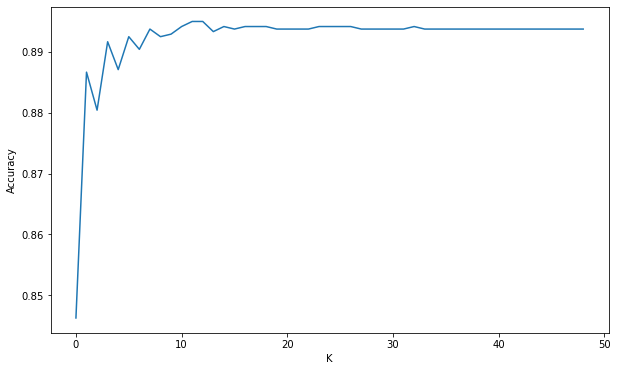

In [101]:
#Plotting Graph of KNN Classifier, how changing K effects accuracy score
plt.figure(figsize=(10,6)) 
plt.plot(knnscore)
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.show()

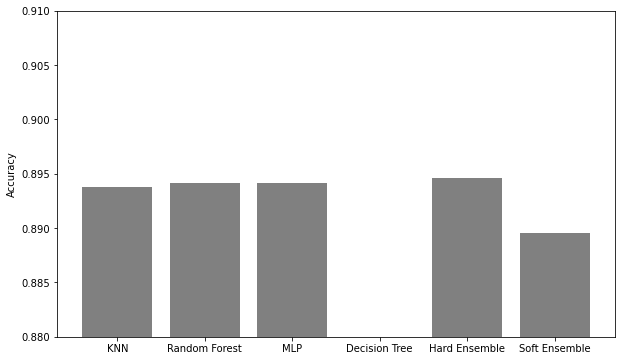

In [102]:
#Plotting Graph of Classifier test accuracy
y = [knnResult,randomforestResult,mlpResult,decisiontreeResult,hardEnsembleResult,softEnsembleResult]
x = ['KNN','Random Forest','MLP', 'Decision Tree','Hard Ensemble', 'Soft Ensemble']
plt.figure(figsize=(10,6)) 
plt.ylabel("Accuracy")
plt.bar(x,y,color = 'grey')
plt.ylim(0.88, 0.91)
plt.show()

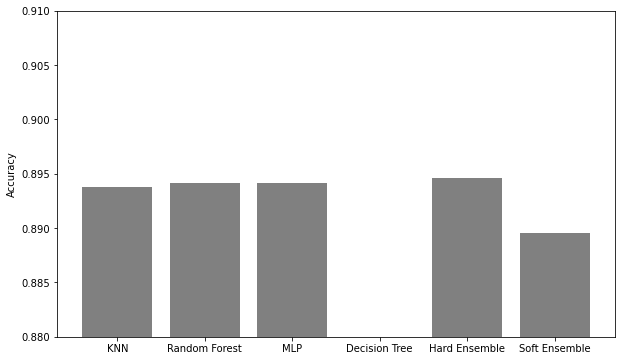

In [103]:
#Plotting Graph of Classifier test accuracy with Cross Fold Validation
x = [knnCVResult,randomforestCVResult,mlpCVResult,decisiontreeCVResult,hardEnsembleCVResult,softEnsembleCVResult]
x = ['KNN','Random Forest','MLP', 'Decision Tree','Hard Ensemble', 'Soft Ensemble']
plt.figure(figsize=(10,6)) 
plt.ylabel("Accuracy")
plt.bar(x,y,color = 'grey')
plt.ylim(0.88, 0.91)
plt.show()